<a href="https://colab.research.google.com/github/vglykos/House-Kaggle-Competition/blob/main/House_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
import math


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load train and test dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GitHub/House-Kaggle/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GitHub/House-Kaggle/test.csv')
test_id = test['Id']

In [ ]:
#inspect data
train.shape , test.shape

((1460, 81), (1459, 80))

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# test.info()

##training set and testing set have some features with missing values

In [ ]:
print("training set skewness: %f" % train['SalePrice'].skew())
print("training set kurtosis: %f" % train['SalePrice'].kurt())

training set skewness: 1.882876
training set kurtosis: 6.536282


In [ ]:
train.select_dtypes(exclude= ['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#Some of the training dataset features have significant skewness
for col in train.select_dtypes(exclude= ['object']).columns:
    print("{}: {:1.2f}" .format(col, (train[col].skew())))

Id: 0.00
MSSubClass: 1.41
LotFrontage: 2.16
LotArea: 12.21
OverallQual: 0.22
OverallCond: 0.69
YearBuilt: -0.61
YearRemodAdd: -0.50
MasVnrArea: 2.67
BsmtFinSF1: 1.69
BsmtFinSF2: 4.26
BsmtUnfSF: 0.92
TotalBsmtSF: 1.52
1stFlrSF: 1.38
2ndFlrSF: 0.81
LowQualFinSF: 9.01
GrLivArea: 1.37
BsmtFullBath: 0.60
BsmtHalfBath: 4.10
FullBath: 0.04
HalfBath: 0.68
BedroomAbvGr: 0.21
KitchenAbvGr: 4.49
TotRmsAbvGrd: 0.68
Fireplaces: 0.65
GarageYrBlt: -0.65
GarageCars: -0.34
GarageArea: 0.18
WoodDeckSF: 1.54
OpenPorchSF: 2.36
EnclosedPorch: 3.09
3SsnPorch: 10.30
ScreenPorch: 4.12
PoolArea: 14.83
MiscVal: 24.48
MoSold: 0.21
YrSold: 0.10
SalePrice: 1.88


####There is skewness in the testing data

#DATA ANALYSIS

####Correlations

In [ ]:
# Correlate features with the target variable:SalePrice
train.corr()["SalePrice"].abs().sort_values(ascending=False)*100

SalePrice        100.000000
OverallQual       79.098160
GrLivArea         70.862448
GarageCars        64.040920
GarageArea        62.343144
TotalBsmtSF       61.358055
1stFlrSF          60.585218
FullBath          56.066376
TotRmsAbvGrd      53.372316
YearBuilt         52.289733
YearRemodAdd      50.710097
GarageYrBlt       48.636168
MasVnrArea        47.749305
Fireplaces        46.692884
BsmtFinSF1        38.641981
LotFrontage       35.179910
WoodDeckSF        32.441344
2ndFlrSF          31.933380
OpenPorchSF       31.585623
HalfBath          28.410768
LotArea           26.384335
BsmtFullBath      22.712223
BsmtUnfSF         21.447911
BedroomAbvGr      16.821315
KitchenAbvGr      13.590737
EnclosedPorch     12.857796
ScreenPorch       11.144657
PoolArea           9.240355
MSSubClass         8.428414
OverallCond        7.785589
MoSold             4.643225
3SsnPorch          4.458367
YrSold             2.892259
LowQualFinSF       2.560613
Id                 2.191672
MiscVal            2

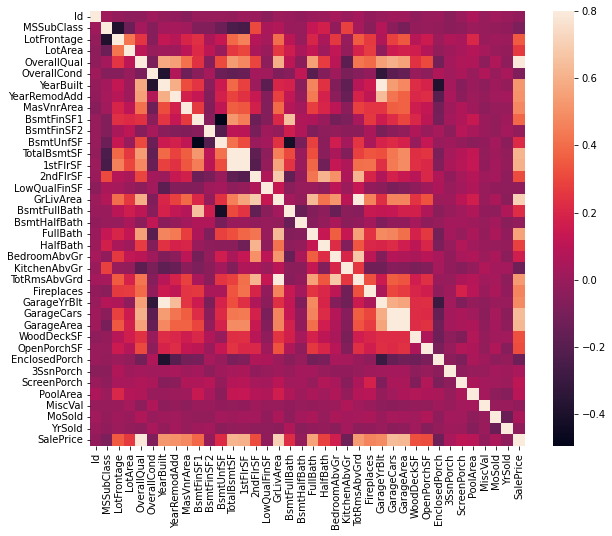

In [ ]:
#Correlation Heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), vmax=.8, square=True);

#MISSING DATA

In [ ]:
#find how many values are missing in the train set
train.isnull().sum().sort_values(ascending=False)
train_missing= pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['num_miss'])
train_missing[train_missing.num_miss>0]

,num_miss
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [ ]:
#Create a table with the missing values and correlation to the SalePrice
corr_=[]
for feat in train_missing.index:
    if train[feat].dtypes == "object":
        corr_.append(np.nan)
    else:
        corr_.append(train['SalePrice'].corr(train[feat]))
        

train_missing['SaleProce Corr'] = corr_

train_missing[train_missing.num_miss>0]

,num_miss,SaleProce Corr
PoolQC,1453,NaN
MiscFeature,1406,NaN
Alley,1369,NaN
Fence,1179,NaN
FireplaceQu,690,NaN
LotFrontage,259,0.351799
GarageYrBlt,81,0.486362
GarageCond,81,NaN
GarageType,81,NaN
GarageFinish,81,NaN


####We are lucky because most of the features with missing values do not correlate with SalePrice. 
####Except for "LotFrontage", "GarageYrBlt" and "MasVnrArea"

####Lets see if these interesting features correlate with others

####Anyway. From the training set we looked for missing values and then for numerical columns we looked how strongly they correlate with the sailing price. Of course there are categorical columns with many missing values which I cannot correlate.
####It doen't really matter, and this analysis is a bit useless since I wil RFE the model. So I need to fill in the missing values for all the features.

####Next, I will do the same analysis for the test set

In [ ]:
#find how many values are missing in the test set
test.isnull().sum().sort_values(ascending=False)
test_missing= pd.DataFrame(test.isnull().sum().sort_values(ascending=False), columns=['num_miss'])
test_missing[test_missing.num_miss>0]

,num_miss
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


In [ ]:
train["PoolQC"].value_counts()

#Conclusion from inspecting the missing values
##The rule says that when more than half of the data are missing, then we drop the features. 
##So, I will drop "PoolQC", "MiscFeature", "Alley", and "Fence" 
## I will also drop "Id". It is annoying

In [ ]:
drop_cols= ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']
train.drop(columns= drop_cols, inplace= True)
test.drop(columns= drop_cols, inplace= True)

In [ ]:
#find how many values are missing in the train set
train.isnull().sum().sort_values(ascending=False)
train_missing= pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['num_miss'])
train_missing[train_missing.num_miss>0]

###Inspect features with missing values to decide about the imputation strategy

In [ ]:
train["FireplaceQu"].value_counts()
#('cat_imputer', SimpleImputer(strategy='constant', fill_value='None'))

In [ ]:
# Linear feet of street connected to property
train["LotFrontage"].value_counts()
#I suppose when null it means that the value is 0
# ('num_imputer', SimpleImputer(strategy='constant', fill_value=0))

In [ ]:
#GarageType: Garage location
train["GarageType"].value_counts()
#I suppose when null it means that the value is NA
# ('cat_imputer', SimpleImputer(strategy='constant', fill_value='None'))

In [ ]:

#GarageType: Garage location
train["GarageYrBlt"].value_counts()
#Maybe i should put the mean or the year the house was built
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:

train["GarageCond"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
# BsmtExposure
train["BsmtExposure"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["BsmtFinType2"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["BsmtQual"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["BsmtCond"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["BsmtFinType1"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["MasVnrType"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["MasVnrArea"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

In [ ]:
train["Electrical"].value_counts()
# ('cat_imputer', SimpleImputer(strategy='most_frequent')

Prepare column groups for label and one-hot-encoding 

In [ ]:
pd.options.display.max_columns = None
x = train.select_dtypes(include=[int])
x.head(10)

In [ ]:
#Objects are categorical data and I will perform LabelEncoder and One-Hot Encoder
#Float are numerical data
#Int could be categorical or numerical data. If they are categorical I will keep them are int and perform one-hot-encoding
##One way is to check the maximum value in the column. 
##A common practice is that If max<=10 then it is categorical. Otherwise numerical.
##Another safer way is to produce a scatter plot


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 8))
##Here I have my doubts about "LowQualFinSF" and I produced the scatterplot. 
sns.scatterplot(ax=ax1, data=train, x="LowQualFinSF", y="SalePrice")
##This is a numerical value

##The next one is an exemption. It is a categorical with 14 values 
sns.scatterplot(ax=ax2, data=train, x="TotRmsAbvGrd", y="SalePrice")

##So, I will set the max limit to 15


#First imputation
##Create pipelines for individual feature groups

In [ ]:
#split the data in numerical and categorical columns
df = train.select_dtypes(exclude= [object]).drop(columns="SalePrice")
num_cols= df.columns

df = train.select_dtypes(include= [object])
cat_cols= df.columns

In [ ]:
print('Number of missing values before imputation: {}'.
          format(pd.DataFrame(train).isnull().sum().sum()))

Number of missing values before imputation: 6965


In [ ]:
num_pipe = Pipeline([
    ('num_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

cat_pipe = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipe',  num_pipe,  num_cols),
        ('cat_pipe',  cat_pipe,  cat_cols)
        ])

imputed_train = preprocessor.fit_transform(train)

print('Number of missing values after imputation: {}'.
          format(pd.DataFrame(imputed_train).isnull().sum().sum()))

Number of missing values after imputation: 0


In [ ]:
preprocessor.transformers

#Next One-Hot-Encoding

##But lets drop "SalePrice"

In [ ]:
y = train.SalePrice
X = train.drop('SalePrice', axis=1)

In [ ]:
preprocessor.get_params()['cat_pipe'].steps.append([
    'ohe_obj_cat', OneHotEncoder(sparse=False, handle_unknown='ignore')
])

In [ ]:
preprocessor.transformers

#Add the scaling

In [ ]:
preprocessor.get_params()['num_pipe'].steps.append([
    'scaler_num', StandardScaler()
])

preprocessor.get_params()['cat_pipe'].steps.append([
    'scaler_cat', StandardScaler()
])


#Choose model with GridSearchCV 

In [ ]:
preprocessor.transformer

In [ ]:
#set the scoring for the model
from sklearn.metrics import make_scorer, mean_squared_log_error

def rmsle(y, y_pred):
    return -np.sqrt(mean_squared_log_error(y, y_pred))

scoring = make_scorer(rmsle, greater_is_better=False)

In [ ]:
# RandomForestRegressor with GridSearchCV
model = RandomForestRegressor()

estimator_RF = Pipeline([
    ('preproc', preprocessor),
    ('model', model)
])


from sklearn.model_selection import GridSearchCV


param_grid = {'model__n_estimators': [100, 200, 300, 500, 1000],
               'model__max_features': ['sqrt', 'log2'],
               'model__max_depth': [None, 1, 2, 5, 10]}

grid_RF = GridSearchCV(estimator_RF, param_grid, scoring= scoring, n_jobs=-1, cv=5)
grid_RF.fit(X, y)

grid_RF_res = grid_RF.cv_results_['mean_test_score'], grid_RF.cv_results_['std_test_score']

In [ ]:
grid_RF_res.get_params()

In [ ]:
grid_RF_res.get_params().keys()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune

estimator_XGB = Pipeline([
    ('preproc', preprocessor),
    ('model', XGBRegressor())
])


param_grid = { 'model__max_depth': [2, 4, 6],
           'model__n_estimators': [100, 500, 1000, 2000],
           'model__colsample_bytree': [0.2, 0.6, 0.8],
           'model__min_child_weight': [3, 5, 7],
           'model__gamma': [0.3, 0.5, 0.7],
           'model__subsample': [0.4, 0.6, 0.8],
           'model__learning_rate': [0.001, 0.01, 0.1, 1]}

            
grid_XGB = GridSearchCV(estimator_XGB, param_grid, scoring= scoring, n_jobs=-1, cv=5)
grid_XGB.fit(X, y)

grid_XGB_res = grid_XGB.cv_results_['mean_test_score'], grid_XGB.cv_results_['std_test_score']


#GradientBoostingClassifier

In [ ]:


model = GradientBoostingRegressor()

estimator_GBR = Pipeline([
    ('preproc', preprocessor),
    ('model', model)
])


param_grid = {'classifier__n_estimators': [10, 20, 50],
              'classifier__learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'classifier__max_depth':[3,5,8],
              'classifier__max_features':["log2","sqrt"],
              'classifier__criterion': ["friedman_mse"]}

grid_GBR = GridSearchCV(estimator_GBR, param_grid, scoring= scoring, n_jobs=-1, cv=5)
grid_GBR.fit(X, y)

grid_GBR_res = grid_GBR.cv_results_['mean_test_score'], grid_GBR.cv_results_['std_test_score']

In [ ]:
#Conclusion XGB prodices the best results

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = grid_XGB.predict(test)
# sub.to_csv('mysubmission.csv',index=False)

In [ ]:
from google.colab import files

sub.to_csv('submission.csv' , index=False)
files.download('submission.csv')

In [ ]:
#prediction score 0.1246